In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

Holt's Winter Exponential Smoothing Prediction

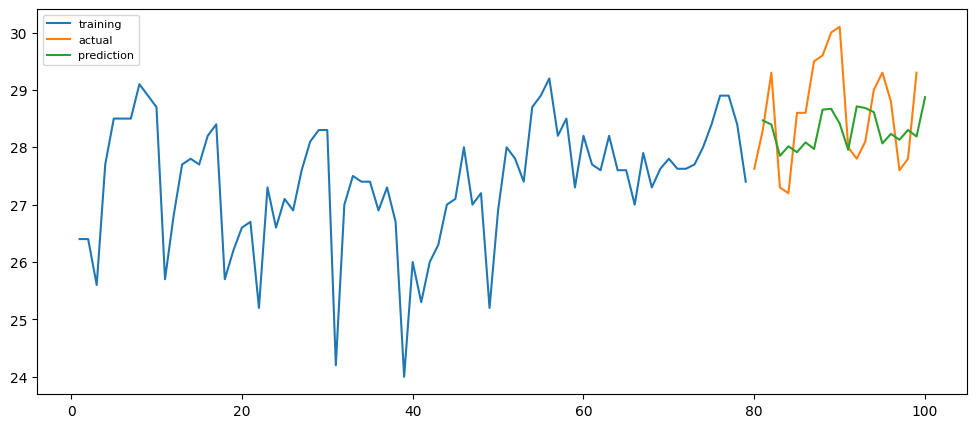

MAE: 0.8380122739075041
MSE: 0.9012079517905411
RMSE: 0.949319731065641
MAPE: 0.029060238845840785
R2 Score: -0.18047341814319573


In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv',parse_dates=True)
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:100]
data = data['Temperature']
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean())
data = pd.DataFrame(data)

#split data train and test
train_size = int(len(data) * 0.80)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

#fit model and predict
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=test_data.index[0], end=test_data.index[-1])

#plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred, label='prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#calculate Error
print('MAE:', mean_absolute_error(test_data, pred))
print('MSE:', mean_squared_error(test_data, pred))
print('RMSE:', np.sqrt(mean_squared_error(test_data, pred)))
print('MAPE:', mean_absolute_percentage_error(test_data, pred))
print('R2 Score:', r2_score(test_data, pred))

Holt's Winter Exponential Smoothing FORECAST

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


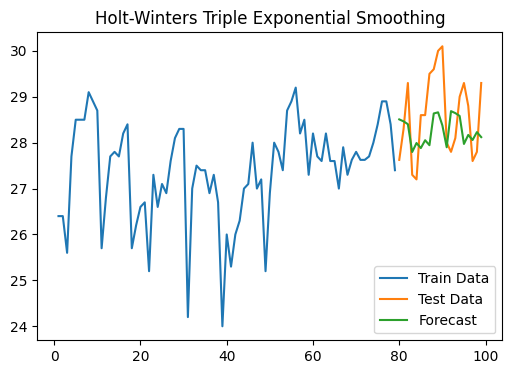

MAE: 0.803
MAPE: 0.028
MSE: 0.831
R2: -0.089
RMSE: 0.912


In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv',parse_dates=True)
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:100]
data = data['Temperature']
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean())
data = pd.DataFrame(data)

#split data train and test
train_size = int(len(data) * 0.80)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

# Fit the Holt's Winter Exponential Smoothing model to the training data
# # and make predictions on the test data
# fit1 = ExponentialSmoothing(np.asarray(train_data['Temperature']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
# y_pred = fit1.forecast(len(test_data))

# Plot the test data and the predictions
# test_data['Temperature'].plot(figsize=(16,5), legend=True)
# pd.Series(y_pred, index=test_data.index).plot(legend=True)
# plt.show()

# Calculate the mean absolute error
# mae = mean_absolute_error(test_data['Temperature'], y_pred)
# print('MAE: %f' % mae)
# mape = mean_absolute_percentage_error(test_data['Temperature'], y_pred)
# print('MAPE: %f' % mape)
# mse = mean_squared_error(test_data['Temperature'], y_pred)
# print('MSE: %f' % mse)
# r2 = r2_score(test_data['Temperature'], y_pred)
# print('R2: %f' % r2)
# rmse = np.sqrt(mean_squared_error(test_data['Temperature'], y_pred))
# print('RMSE: %f' % rmse)

model = ExponentialSmoothing(train_data['Temperature'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_predictions = model.forecast(len(test_data))

train_data['Temperature'].plot(legend=True,label='Train Data')
test_data['Temperature'].plot(legend=True,label='Test Data',figsize=(6,4))
test_predictions.plot(legend=True,label='Forecast')
plt.title('Holt-Winters Triple Exponential Smoothing')
plt.show()

mae = mean_absolute_error(test_data['Temperature'], test_predictions)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(test_data['Temperature'], test_predictions)
print('MAPE: %.3f' % mape)
mse = mean_squared_error(test_data['Temperature'], test_predictions)
print('MSE: %.3f' % mse)
r2 = r2_score(test_data['Temperature'], test_predictions)
print('R2: %.3f' % r2)
rmse = np.sqrt(mean_squared_error(test_data['Temperature'], test_predictions))
print('RMSE: %.3f' % rmse)


TEST HWES Tio Version

In [5]:
data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv',parse_dates=True)
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:100]
data = data['Temperature']
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean())
data = pd.DataFrame(data)

#split data train and test
train_size = int(len(data) * 0.80)
train_data, test_data = data[:90], data[90:]

param_grid = {
    'seasonal': ['add', 'mul'],
    'trend': ['add', 'mul'],
    'seasonal_periods': [4, 12],
    'smoothing_level': np.linspace(0.1, 0.9, 9),
    'smoothing_slope': np.linspace(0.1, 0.9, 9),
    'smoothing_seasonal': np.linspace(0.1, 0.9, 9)
}

#grid search
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit


result = []
for seasonal in param_grid['seasonal']:
    for trend in param_grid['trend']:
        for seasonal_period in param_grid['seasonal_periods']:
            for smoothing_level in param_grid['smoothing_level']:
                for smoothing_slope in param_grid['smoothing_slope']:
                    for smoothing_seasonal in param_grid['smoothing_seasonal']:
                        try : 
                            model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
                            model_fit = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)

                            #create prediction
                            pred = model_fit.predict(start=len(train), end = len(train)+len(test)-1)
                            r2 = r2_score(test_data, pred)
                            result.append([seasonal, trend, seasonal_period, smoothing_level, smoothing_slope, smoothing_seasonal, r2])

                        except :
                            print('error')

# find best parameter for r2 score
best_param = max(result, key=lambda x:x[-1])
model = ExponentialSmoothing(train_data, seasonal= best_param[0], trend= best_param[1], seasonal_period = best_param[2])
model_fit = model.fit(smoothing_level=best_param[3], smoothing_slope=best_param[4], smoothing_seasonal=best_param[5])
pred = model_fit.forecast(len(test_data))

#caculate error 
print('MAE:', mean_absolute_error(test_data, pred))
print('MSE:', mean_squared_error(test_data, pred))
print('RMSE:', np.sqrt(mean_squared_error(test_data, pred)))
print('MAPE:', mean_absolute_percentage_error(test_data, pred))
print('R2 Score:', r2_score(test_data, pred))

plt.plot(pred, label='prediction', color = 'red')
plt.plot(test_data, label='Test', color = 'blue')
plt.legend(loc='upper left', fontsize=8)
plt.show()

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input


error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai


error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_se

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_se

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai


error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_se

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_dat

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo


error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Exp

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input


error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai


error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoo

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_se

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error
error

<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input


error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)


error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input

error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)


error
error
error
error
error
error
error
error


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(trai

error
error
error
error
error


<ipython-input-5-f768f7027b54>:37: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, smoothing_seasonal=smoothing_seasonal)


error


ValueError: ignored